# Analysis of Netflix Movies and TV Shows data

Team Member:
1. Nikita Navkar
2. Yuraj Dilip Vartak

Description: 
Netflix dataset consists of TV shows and movies data available on Netflix. The dataset is available on Kaggle. We have used  Numpy and Pandas libraries for data process, for visualize we have used matplotlib and seaborn libraries.

# Connect to mongodb server

In [23]:
import sys
from pymongo import MongoClient
#from pymongo.errors import ConnectionFailure

client = MongoClient('mongodb://localhost:27017/')
db = client.Project3
collection = db.Netflix
print("Connected to MongoDB Server Successfully")

Connected to MongoDB Server Successfully


# Importing Libraries

In [24]:
import numpy as np
import pprint
import pandas as pd
import jovian
import matplotlib.pyplot as plt
import seaborn as sns
print("Libraries are imported succcessfully")

Libraries are imported succcessfully


# Tasks

1. Display all the movies released in the year 2020 in India with a rating of TV-14

In [25]:
collection.count_documents({"type": "Movie","release_year":"2020","country":"India","rating":"TV-14"})

23

In [26]:
cursor = collection.find({"type": "Movie","release_year":"2020","country":"India","rating":"TV-14"})
df = pd.DataFrame(list(cursor))
df.head()
# df -> To print all the values

,_id,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in
0,617a20730ec5678a93f0cc37,s127,Movie,Shikara,Vidhu Vinod Chopra,"Aadil Khan, Sadia Khateeb, Zain Khan Durrani, ...",India,"September 2, 2021",2020,TV-14,115 min,"Dramas, International Movies, Romantic Movies"
1,617a20730ec5678a93f0cdbf,s519,Movie,Har Kisse Ke Hisse: Kaamyaab,Hardik Mehta,"Sanjay Mishra, Deepak Dobriyal, Sarika Singh, ...",India,"July 6, 2021",2020,TV-14,105 min,"Dramas, International Movies"
2,617a20740ec5678a93f0cfe6,s1070,Movie,Uppena,Buchi Babu Sana,"Panja Vaisshnav Tej, Krithi Shetty, Vijay Seth...",India,"April 14, 2021",2020,TV-14,145 min,"Dramas, International Movies, Romantic Movies"
3,617a20740ec5678a93f0d01b,s1123,Movie,Madam Chief Minister,Subhash Kapoor,"Richa Chadda, Saurabh Shukla, Manav Kaul, Shub...",India,"April 1, 2021",2020,TV-14,121 min,"Dramas, International Movies"
4,617a20740ec5678a93f0d095,s1245,Movie,Indoo Ki Jawani,Abir Sengupta,"Kiara Advani, Aditya Seal, Mallika Dua, Rakesh...",India,"March 2, 2021",2020,TV-14,115 min,"Action & Adventure, Comedies, International Mo..."


2. Movies/TV shows under the specific categories

In [27]:
cursor_2 = collection.find({
    "rating" : { "$in" : ["PG-13", "TV-MA"] },"country": {"$in" : ["South Africa", "India"]}
})

df = pd.DataFrame(list(cursor_2))
df.head()

,_id,show_id,type,title,cast,country,date_added,release_year,rating,duration,listed_in,director
0,617a20730ec5678a93f0cbba,s2,TV Show,Blood & Water,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries",NaN
1,617a20730ec5678a93f0cbbd,s5,TV Show,Kota Factory,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",NaN
2,617a20730ec5678a93f0cc83,s203,Movie,Kyaa Kool Hai Hum,"Tusshar Kapoor, Riteish Deshmukh, Isha Koppika...",India,"August 27, 2021",2005,TV-MA,165 min,"Comedies, International Movies, Music & Musicals",Sangeeth Sivan
3,617a20730ec5678a93f0cc84,s204,Movie,Kyaa Kool Hain Hum 3,"Tusshar Kapoor, Aftab Shivdasani, Krishna Abhi...",India,"August 27, 2021",2016,TV-MA,124 min,"Comedies, International Movies",Umesh Ghadge
4,617a20730ec5678a93f0cc85,s205,Movie,Kyaa Super Kool Hain Hum,"Tusshar Kapoor, Riteish Deshmukh, Anupam Kher,...",India,"August 27, 2021",2012,TV-MA,136 min,"Comedies, International Movies",Sachin Yardi


In [28]:
cursor = collection.find()
df = pd.DataFrame(list(cursor))
df

,_id,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in,cast
0,617a20730ec5678a93f0cbb9,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,NaN
1,617a20730ec5678a93f0cbba,s2,TV Show,Blood & Water,NaN,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban..."
2,617a20730ec5678a93f0cbbb,s3,TV Show,Ganglands,Julien Leclercq,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...","Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi..."
3,617a20730ec5678a93f0cbbc,s4,TV Show,Jailbirds New Orleans,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV",NaN
4,617a20730ec5678a93f0cbbd,s5,TV Show,Kota Factory,NaN,India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...","Mayur More, Jitendra Kumar, Ranjan Raj, Alam K..."
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,617a20740ec5678a93f0ee1b,s8803,Movie,Zodiac,David Fincher,United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","Mark Ruffalo, Jake Gyllenhaal, Robert Downey J..."
8803,617a20740ec5678a93f0ee1c,s8804,TV Show,Zombie Dumb,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies",NaN
8804,617a20740ec5678a93f0ee1d,s8805,Movie,Zombieland,Ruben Fleischer,United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies","Jesse Eisenberg, Woody Harrelson, Emma Stone, ..."
8805,617a20740ec5678a93f0ee1e,s8806,Movie,Zoom,Peter Hewitt,United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Tim Allen, Courteney Cox, Chevy Chase, Kate Ma..."


In [29]:
df.shape

(8807, 12)

In [30]:
netflix_df_copy = df.copy()
netflix_df = df.copy()

In [31]:
netflix_df_copy

,_id,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in,cast
0,617a20730ec5678a93f0cbb9,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,NaN
1,617a20730ec5678a93f0cbba,s2,TV Show,Blood & Water,NaN,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban..."
2,617a20730ec5678a93f0cbbb,s3,TV Show,Ganglands,Julien Leclercq,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...","Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi..."
3,617a20730ec5678a93f0cbbc,s4,TV Show,Jailbirds New Orleans,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV",NaN
4,617a20730ec5678a93f0cbbd,s5,TV Show,Kota Factory,NaN,India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...","Mayur More, Jitendra Kumar, Ranjan Raj, Alam K..."
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,617a20740ec5678a93f0ee1b,s8803,Movie,Zodiac,David Fincher,United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","Mark Ruffalo, Jake Gyllenhaal, Robert Downey J..."
8803,617a20740ec5678a93f0ee1c,s8804,TV Show,Zombie Dumb,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies",NaN
8804,617a20740ec5678a93f0ee1d,s8805,Movie,Zombieland,Ruben Fleischer,United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies","Jesse Eisenberg, Woody Harrelson, Emma Stone, ..."
8805,617a20740ec5678a93f0ee1e,s8806,Movie,Zoom,Peter Hewitt,United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Tim Allen, Courteney Cox, Chevy Chase, Kate Ma..."


# Dropping few columns from the table

In [32]:
netflix_df_copy.drop(['director','cast','date_added'],axis=1,inplace=True)

netflix_df_copy

,_id,show_id,type,title,country,release_year,rating,duration,listed_in
0,617a20730ec5678a93f0cbb9,s1,Movie,Dick Johnson Is Dead,United States,2020,PG-13,90 min,Documentaries
1,617a20730ec5678a93f0cbba,s2,TV Show,Blood & Water,South Africa,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries"
2,617a20730ec5678a93f0cbbb,s3,TV Show,Ganglands,NaN,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
3,617a20730ec5678a93f0cbbc,s4,TV Show,Jailbirds New Orleans,NaN,2021,TV-MA,1 Season,"Docuseries, Reality TV"
4,617a20730ec5678a93f0cbbd,s5,TV Show,Kota Factory,India,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ..."
...,...,...,...,...,...,...,...,...,...
8802,617a20740ec5678a93f0ee1b,s8803,Movie,Zodiac,United States,2007,R,158 min,"Cult Movies, Dramas, Thrillers"
8803,617a20740ec5678a93f0ee1c,s8804,TV Show,Zombie Dumb,NaN,2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies"
8804,617a20740ec5678a93f0ee1d,s8805,Movie,Zombieland,United States,2009,R,88 min,"Comedies, Horror Movies"
8805,617a20740ec5678a93f0ee1e,s8806,Movie,Zoom,United States,2006,PG,88 min,"Children & Family Movies, Comedies"


In [33]:
netflix_df_copy['country'].replace(np.NaN,'United States',inplace=True)

netflix_df_copy

,_id,show_id,type,title,country,release_year,rating,duration,listed_in
0,617a20730ec5678a93f0cbb9,s1,Movie,Dick Johnson Is Dead,United States,2020,PG-13,90 min,Documentaries
1,617a20730ec5678a93f0cbba,s2,TV Show,Blood & Water,South Africa,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries"
2,617a20730ec5678a93f0cbbb,s3,TV Show,Ganglands,United States,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
3,617a20730ec5678a93f0cbbc,s4,TV Show,Jailbirds New Orleans,United States,2021,TV-MA,1 Season,"Docuseries, Reality TV"
4,617a20730ec5678a93f0cbbd,s5,TV Show,Kota Factory,India,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ..."
...,...,...,...,...,...,...,...,...,...
8802,617a20740ec5678a93f0ee1b,s8803,Movie,Zodiac,United States,2007,R,158 min,"Cult Movies, Dramas, Thrillers"
8803,617a20740ec5678a93f0ee1c,s8804,TV Show,Zombie Dumb,United States,2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies"
8804,617a20740ec5678a93f0ee1d,s8805,Movie,Zombieland,United States,2009,R,88 min,"Comedies, Horror Movies"
8805,617a20740ec5678a93f0ee1e,s8806,Movie,Zoom,United States,2006,PG,88 min,"Children & Family Movies, Comedies"


In [34]:
netflix_df_copy['rating']

0       PG-13
1       TV-MA
2       TV-MA
3       TV-MA
4       TV-MA
        ...  
8802        R
8803    TV-Y7
8804        R
8805       PG
8806    TV-14
Name: rating, Length: 8807, dtype: object

In [35]:
netflix_df_copy['rating'].replace(np.NaN,'TV-MA',inplace=True)

netflix_df_copy

,_id,show_id,type,title,country,release_year,rating,duration,listed_in
0,617a20730ec5678a93f0cbb9,s1,Movie,Dick Johnson Is Dead,United States,2020,PG-13,90 min,Documentaries
1,617a20730ec5678a93f0cbba,s2,TV Show,Blood & Water,South Africa,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries"
2,617a20730ec5678a93f0cbbb,s3,TV Show,Ganglands,United States,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
3,617a20730ec5678a93f0cbbc,s4,TV Show,Jailbirds New Orleans,United States,2021,TV-MA,1 Season,"Docuseries, Reality TV"
4,617a20730ec5678a93f0cbbd,s5,TV Show,Kota Factory,India,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ..."
...,...,...,...,...,...,...,...,...,...
8802,617a20740ec5678a93f0ee1b,s8803,Movie,Zodiac,United States,2007,R,158 min,"Cult Movies, Dramas, Thrillers"
8803,617a20740ec5678a93f0ee1c,s8804,TV Show,Zombie Dumb,United States,2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies"
8804,617a20740ec5678a93f0ee1d,s8805,Movie,Zombieland,United States,2009,R,88 min,"Comedies, Horror Movies"
8805,617a20740ec5678a93f0ee1e,s8806,Movie,Zoom,United States,2006,PG,88 min,"Children & Family Movies, Comedies"


In [36]:
netflix_df_copy.isnull().sum()

_id             0
show_id         0
type            0
title           0
country         0
release_year    0
rating          0
duration        3
listed_in       0
dtype: int64

3. Relation between Type and Rating of Movies and TV shows

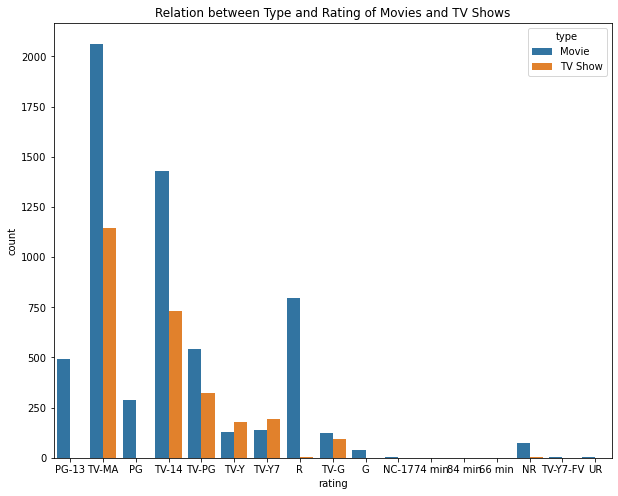

In [37]:
plt.figure(figsize=(10,8))
sns.countplot(x='rating',hue='type',data=netflix_df_copy)
plt.title('Relation between Type and Rating of Movies and TV Shows')
plt.show();

4. Data Segregation for diffferent Countries (Countries with most movies/tv shows produced)

In [38]:
Countries_data = netflix_df_copy.groupby('country').count().sort_values('title',ascending=False).head(5)

Countries_data.reset_index(inplace=True)
Countries_data

,country,_id,show_id,type,title,release_year,rating,duration,listed_in
0,United States,3649,3649,3649,3649,3649,3649,3646,3649
1,India,972,972,972,972,972,972,972,972
2,United Kingdom,419,419,419,419,419,419,419,419
3,Japan,245,245,245,245,245,245,245,245
4,South Korea,199,199,199,199,199,199,199,199


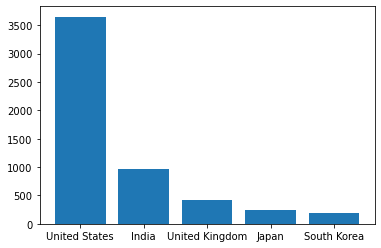

In [39]:
plt.bar(Countries_data.country,Countries_data.title);


5. Top 5 Directors with most titles produced

In [41]:
director_with_most_titles = netflix_df.groupby('director').count().sort_values('rating',ascending=False).head(5)

director_with_most_titles.reset_index(inplace=True)
director_with_most_titles

,director,_id,show_id,type,title,country,date_added,release_year,rating,duration,listed_in,cast
0,Rajiv Chilaka,19,19,19,19,3,19,19,19,19,19,17
1,"Raúl Campos, Jan Suter",18,18,18,18,18,18,18,18,18,18,18
2,Suhas Kadav,16,16,16,16,1,16,16,16,16,16,13
3,Marcus Raboy,16,16,16,16,15,16,16,16,16,16,16
4,Jay Karas,14,14,14,14,14,14,14,14,14,14,14


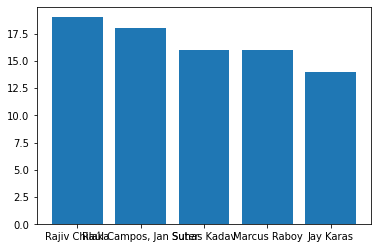

In [42]:
plt.bar(director_with_most_titles.director,director_with_most_titles.title);

6. Actor/Actress with most movies worked in

In [43]:
most_successfully_Actor = netflix_df.groupby('cast').count().sort_values('title',ascending=False).head(1)

most_successfully_Actor.reset_index(inplace=True)
most_successfully_Actor

,cast,_id,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
0,David Attenborough,19,19,19,19,4,19,19,19,19,19,19
